In [3]:
!pip install seaborn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from google.colab import files

In [4]:
uploaded = files.upload()
try:
    data = pd.read_csv(list(uploaded.keys())[0], encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(list(uploaded.keys())[0], encoding='latin1')

Saving Movie Dataset.csv to Movie Dataset.csv


In [5]:
print("Dataset Head:")
print(data.head())

Dataset Head:
                                 Name    Year  Duration            Genre  \
0                                         NaN       NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0     109.0            Drama   
2                         #Homecoming -2021.0      90.0   Drama, Musical   
3                             #Yaaram -2019.0     110.0  Comedy, Romance   
4                      And Once Again -2010.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     NaN    NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN    NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik          Ishita Raj   
4     NaN    NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  


In [6]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Name           0
Year         526
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [7]:
numeric_columns = data.select_dtypes(include=['number']).columns
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data[categorical_columns] = data[categorical_columns].fillna('Unknown')
print("\nMissing Values After Processing:\n", data.isnull().sum())


Missing Values After Processing:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [25]:
median_year = data['Year'].median()
data['Year'] = data['Year'].apply(lambda x: median_year if x < 1900 else x)
data = data[(data['Votes'] > 0) & (data['Duration'] > 0)]
print("Data after handling invalid values:")
print(data.head())

Data after handling invalid values:
                                 Name    Year  Duration            Genre  \
0                                     -1991.0     131.0            Drama   
1  #Gadhvi (He thought he was Gandhi) -1991.0     109.0            Drama   
2                         #Homecoming -1991.0      90.0   Drama, Musical   
3                             #Yaaram -1991.0     110.0  Comedy, Romance   
4                      And Once Again -1991.0     105.0            Drama   

   Rating  Votes            Director       Actor 1             Actor 2  \
0     6.0   55.0       J.S. Randhawa      Manmauji              Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     6.0   55.0  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik          Ishita Raj   
4     6.0   55.0        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  

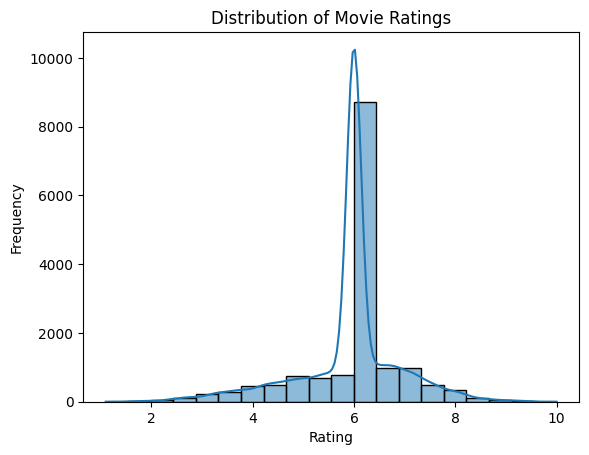

In [8]:
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

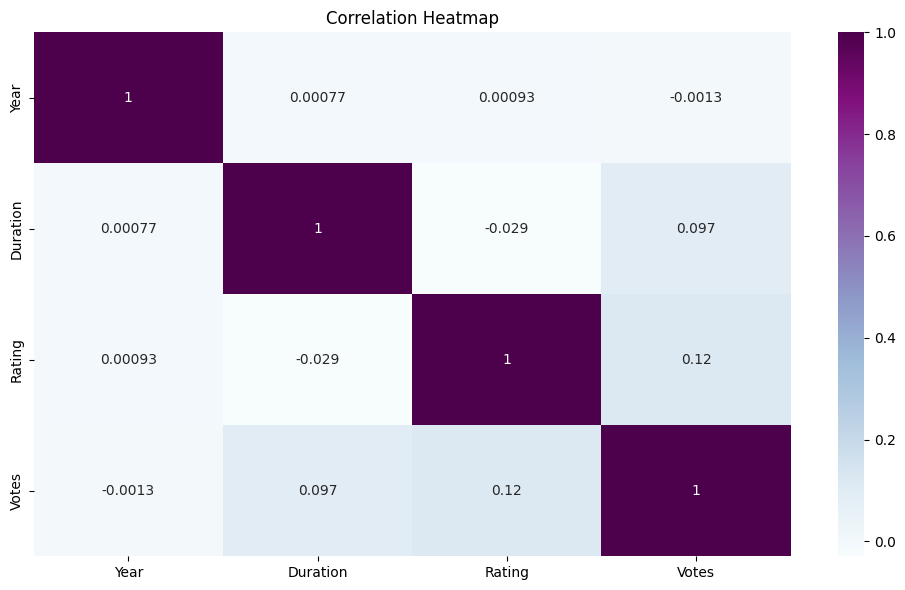

In [26]:
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [10]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

In [11]:
data_encoded = pd.get_dummies(data, columns=features, drop_first=True)
X = data_encoded.drop(columns=[target, 'Name'])
y = data_encoded[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (12407, 20855)
Testing set size: (3102, 20855)


In [19]:
model = RandomForestRegressor(
    n_estimators=10,
    max_depth=5,
    max_features='sqrt',
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=10,
                      random_state=42)

In [20]:
with open('movie_rating_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model training completed.")

Model training completed.


In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.97
R-squared Score: 0.01


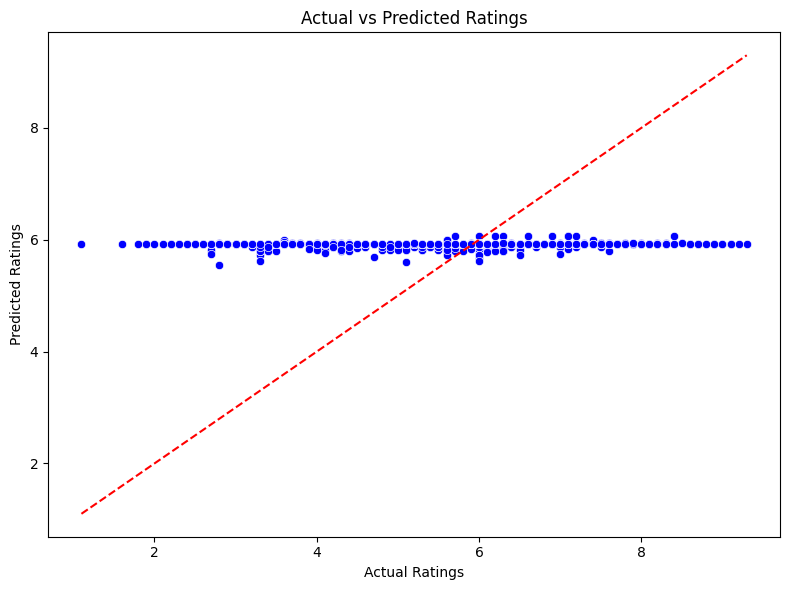

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.tight_layout()
plt.show()

In [23]:
with open('movie_rating_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [24]:
sample_data = X_test.iloc[0].to_frame().T
predicted_rating = loaded_model.predict(sample_data)
print("\nSample Data for Prediction:")
print(sample_data)
print("Predicted Rating:", predicted_rating[0])


Sample Data for Prediction:
         Year Duration Votes Genre_Action, Adventure  \
11115 -1991.0    131.0  55.0                   False   

      Genre_Action, Adventure, Biography Genre_Action, Adventure, Comedy  \
11115                              False                           False   

      Genre_Action, Adventure, Crime Genre_Action, Adventure, Drama  \
11115                          False                          False   

      Genre_Action, Adventure, Family Genre_Action, Adventure, Fantasy  ...  \
11115                           False                            False  ...   

      Actor 3_Zeenat Aman Actor 3_Zeeshan Khan Actor 3_Zeishan Quadri  \
11115               False                False                  False   

      Actor 3_Zenobia Shroff Actor 3_Zohra Actor 3_Zoya Hussain  \
11115                  False         False                False   

      Actor 3_Zubeida Actor 3_Zuber K. Khan Actor 3_Zulfi Sayed  \
11115           False                 False           